In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [106]:
df_train = pd.read_csv('C://Users//nickh//OneDrive - Northeastern University//Notebooks//Intergrated//proposal//data//train.csv')
df_train.drop(['Unnamed: 0'],axis=1,inplace=True)
df_test = pd.read_csv('C://Users//nickh//OneDrive - Northeastern University//Notebooks//Intergrated//proposal//data//test.csv')
df_test.drop(['Unnamed: 0'],axis=1,inplace=True)

df_train.head(5)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [16]:
df_train.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

AxesSubplot(0.125,0.125;0.775x0.755)


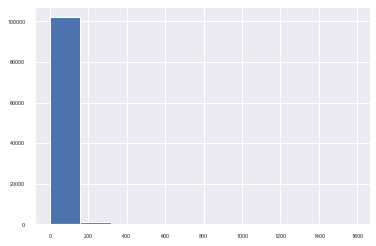

In [191]:
#detect missing values
df_train.isna().sum()
print(df_train['Arrival Delay in Minutes'].hist())

In [107]:
#treat missing values
df_train.fillna(df_train['Arrival Delay in Minutes'].mode()[0],inplace=True)

In [108]:
#find numeric columns
df_train.drop('id',axis=1,inplace=True)
string_col = df_train.select_dtypes(exclude=np.number).columns
for i in string_col:
    print('Column:',i,'has',df_train[i].unique())

Column: Gender has ['Male' 'Female']
Column: Customer Type has ['Loyal Customer' 'disloyal Customer']
Column: Type of Travel has ['Personal Travel' 'Business travel']
Column: Class has ['Eco Plus' 'Business' 'Eco']
Column: satisfaction has ['neutral or dissatisfied' 'satisfied']


In [4]:
df_train1 = df_train.copy()
df_train1.drop(string_col,axis=1,inplace=True)

In [7]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Age                                103904 non-null  int64  
 1   Flight Distance                    103904 non-null  int64  
 2   Inflight wifi service              103904 non-null  int64  
 3   Departure/Arrival time convenient  103904 non-null  int64  
 4   Ease of Online booking             103904 non-null  int64  
 5   Gate location                      103904 non-null  int64  
 6   Food and drink                     103904 non-null  int64  
 7   Online boarding                    103904 non-null  int64  
 8   Seat comfort                       103904 non-null  int64  
 9   Inflight entertainment             103904 non-null  int64  
 10  On-board service                   103904 non-null  int64  
 11  Leg room service                   1039

Age lower_bound=-9.0,upper_bound=87.0
Flight Distance lower_bound=-1579.5,upper_bound=3736.5
Inflight wifi service lower_bound=-1.0,upper_bound=7.0
Departure/Arrival time convenient lower_bound=-1.0,upper_bound=7.0
Ease of Online booking lower_bound=-1.0,upper_bound=7.0
Gate location lower_bound=-1.0,upper_bound=7.0
Food and drink lower_bound=-1.0,upper_bound=7.0
Online boarding lower_bound=-1.0,upper_bound=7.0
Seat comfort lower_bound=-2.5,upper_bound=9.5
Inflight entertainment lower_bound=-1.0,upper_bound=7.0
On-board service lower_bound=-1.0,upper_bound=7.0
Leg room service lower_bound=-1.0,upper_bound=7.0
Baggage handling lower_bound=0.0,upper_bound=8.0
Checkin service lower_bound=1.5,upper_bound=5.5
Inflight service lower_bound=0.0,upper_bound=8.0
Cleanliness lower_bound=-1.0,upper_bound=7.0
Departure Delay in Minutes lower_bound=-18.0,upper_bound=30.0
Arrival Delay in Minutes lower_bound=nan,upper_bound=nan


[]

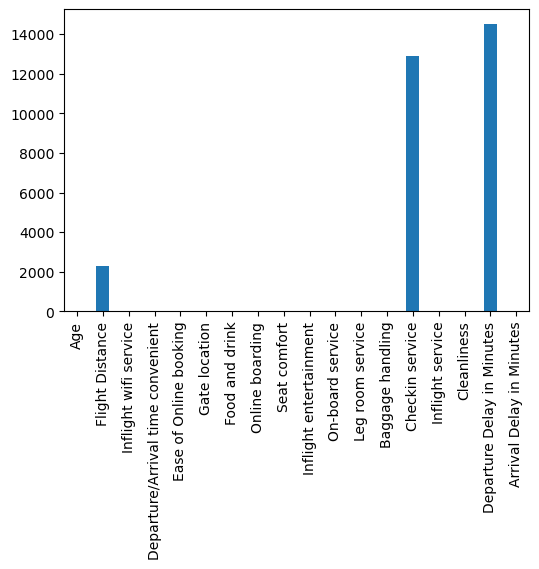

In [5]:
dict_b = {}
for i in df_train1.columns:
    q1,q3=np.percentile(df_train1[i],[25,75])
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr) 
    print(i,'lower_bound={},upper_bound={}'.format(lower_bound,upper_bound))
    a = df_train1[(df_train1[i] < lower_bound) | (df_train1[i] > upper_bound)]
    b=a.shape
    dict_b.update({i:b})
    
outliers = pd.DataFrame(dict_b).T[0]

#bar plot of outliers
fig = plt.figure(dpi=100)
outliers.plot(kind='bar')
plt.plot()



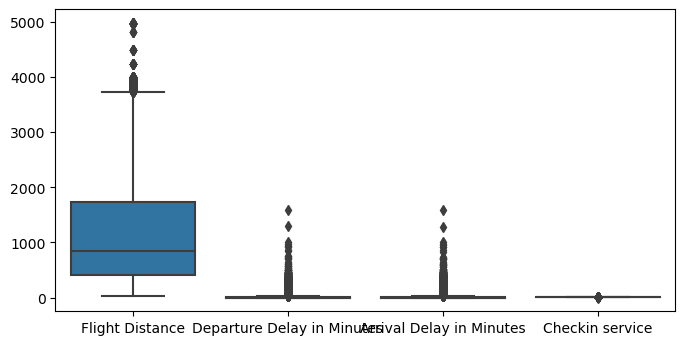

In [6]:
plt.figure(figsize=(8,4),dpi=100)
sns.boxplot(data = df_train1[['Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes','Checkin service']])

In [86]:
df_train = df_train[(df_train['Flight Distance'] >-1579.5) & (df_train['Flight Distance'] <3736.5)]
df_train = df_train[(df_train['Checkin service'] > 1.5 ) & (df_train['Checkin service'] < 5.5)]
df_train = df_train[(df_train['Departure Delay in Minutes'] > -18 ) & (df_train['Departure Delay in Minutes'] < 30)]
df_train = df_train[(df_train['Arrival Delay in Minutes'] > -19.5 ) & (df_train['Arrival Delay in Minutes'] < 32.5)]

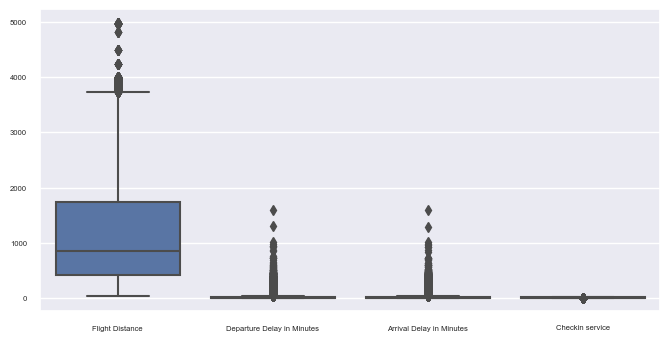

In [197]:
plt.figure(figsize=(8,4),dpi=100)
sns.boxplot(data = df_train[['Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes','Checkin service']])

In [198]:
#remove outliers
print('Before outliers removal:',len(df_train1),'rows')
print('After outliers removal:',len(df_train),'rows')

Before outliers removal: 103904 rows
After outliers removal: 103904 rows


Before outliers removal: 25976 rows
After outliers removal: 18603 rows


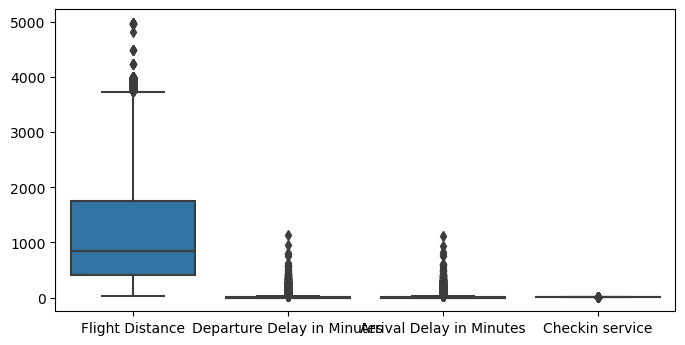

In [33]:
plt.figure(figsize=(8,4),dpi=100)
sns.boxplot(data = df_test[['Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes','Checkin service']])
#remove outliers
print('Before outliers removal:',len(df_test),'rows')
df_test = df_test[(df_test['Flight Distance'] >-1579.5) & (df_test['Flight Distance'] <3736.5)]
df_test = df_test[(df_test['Checkin service'] > 1.5 ) & (df_test['Checkin service'] < 5.5)]
df_test = df_test[(df_test['Departure Delay in Minutes'] > -18 ) & (df_test['Departure Delay in Minutes'] < 30)]
df_test = df_test[(df_test['Arrival Delay in Minutes'] > -19.5 ) & (df_test['Arrival Delay in Minutes'] < 32.5)]
print('After outliers removal:',len(df_test),'rows')

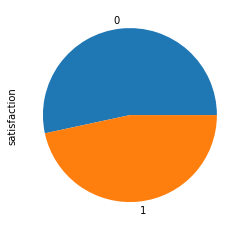

In [57]:
df_train['satisfaction'].value_counts(normalize=True).plot(kind='pie')

# 1/Background of loyal & disloyal customers

In [87]:
loyal_pattern = df_train[df_train['Customer Type'] == 'Loyal Customer']
distance_classifer = []
for i in loyal_pattern['Flight Distance']:
    if i > 0 and i<=1000:
        distance_classifer.append('Under 1000')
    elif i >= 1000 and i <2000:
        distance_classifer.append('Above 1000')
    elif i >= 2000 and i <3000:  
        distance_classifer.append('Above 2000')
    elif i >= 3000 and i <4000:  
        distance_classifer.append('Above 3000')
    elif i >= 4000 and i <5000:
        distance_classifer.append('Above 4000')
    else:
        distance_classifer.append('Above 5000')    
        
age_classfier = []
for i in loyal_pattern['Age']:
    if i < 20:
        age_classfier.append('Teen')
    elif i >= 20 and i <30:
        age_classfier.append('Young')
    elif i >= 30 and i <45:  
        age_classfier.append('Middle Age')
    elif i >= 45 and i <=65:  
        age_classfier.append('Old')
    else:
        age_classfier.append('Elderly')        
loyal_pattern['age_classfier'] = age_classfier        
loyal_pattern['distance_class'] = distance_classifer

<ipython-input-87-a0d2da37173f>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loyal_pattern['age_classfier'] = age_classfier
<ipython-input-87-a0d2da37173f>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loyal_pattern['distance_class'] = distance_classifer


In [88]:
loyal_type = loyal_pattern['Type of Travel'].value_counts(normalize=True)
loyal_class=loyal_pattern['Class'].value_counts(normalize=True)
loyal_distance=loyal_pattern['distance_class'].value_counts(normalize=True)
loyal_age=loyal_pattern['age_classfier'].value_counts(normalize=True)
loyal_gender = loyal_pattern['Gender'].value_counts(normalize=True)

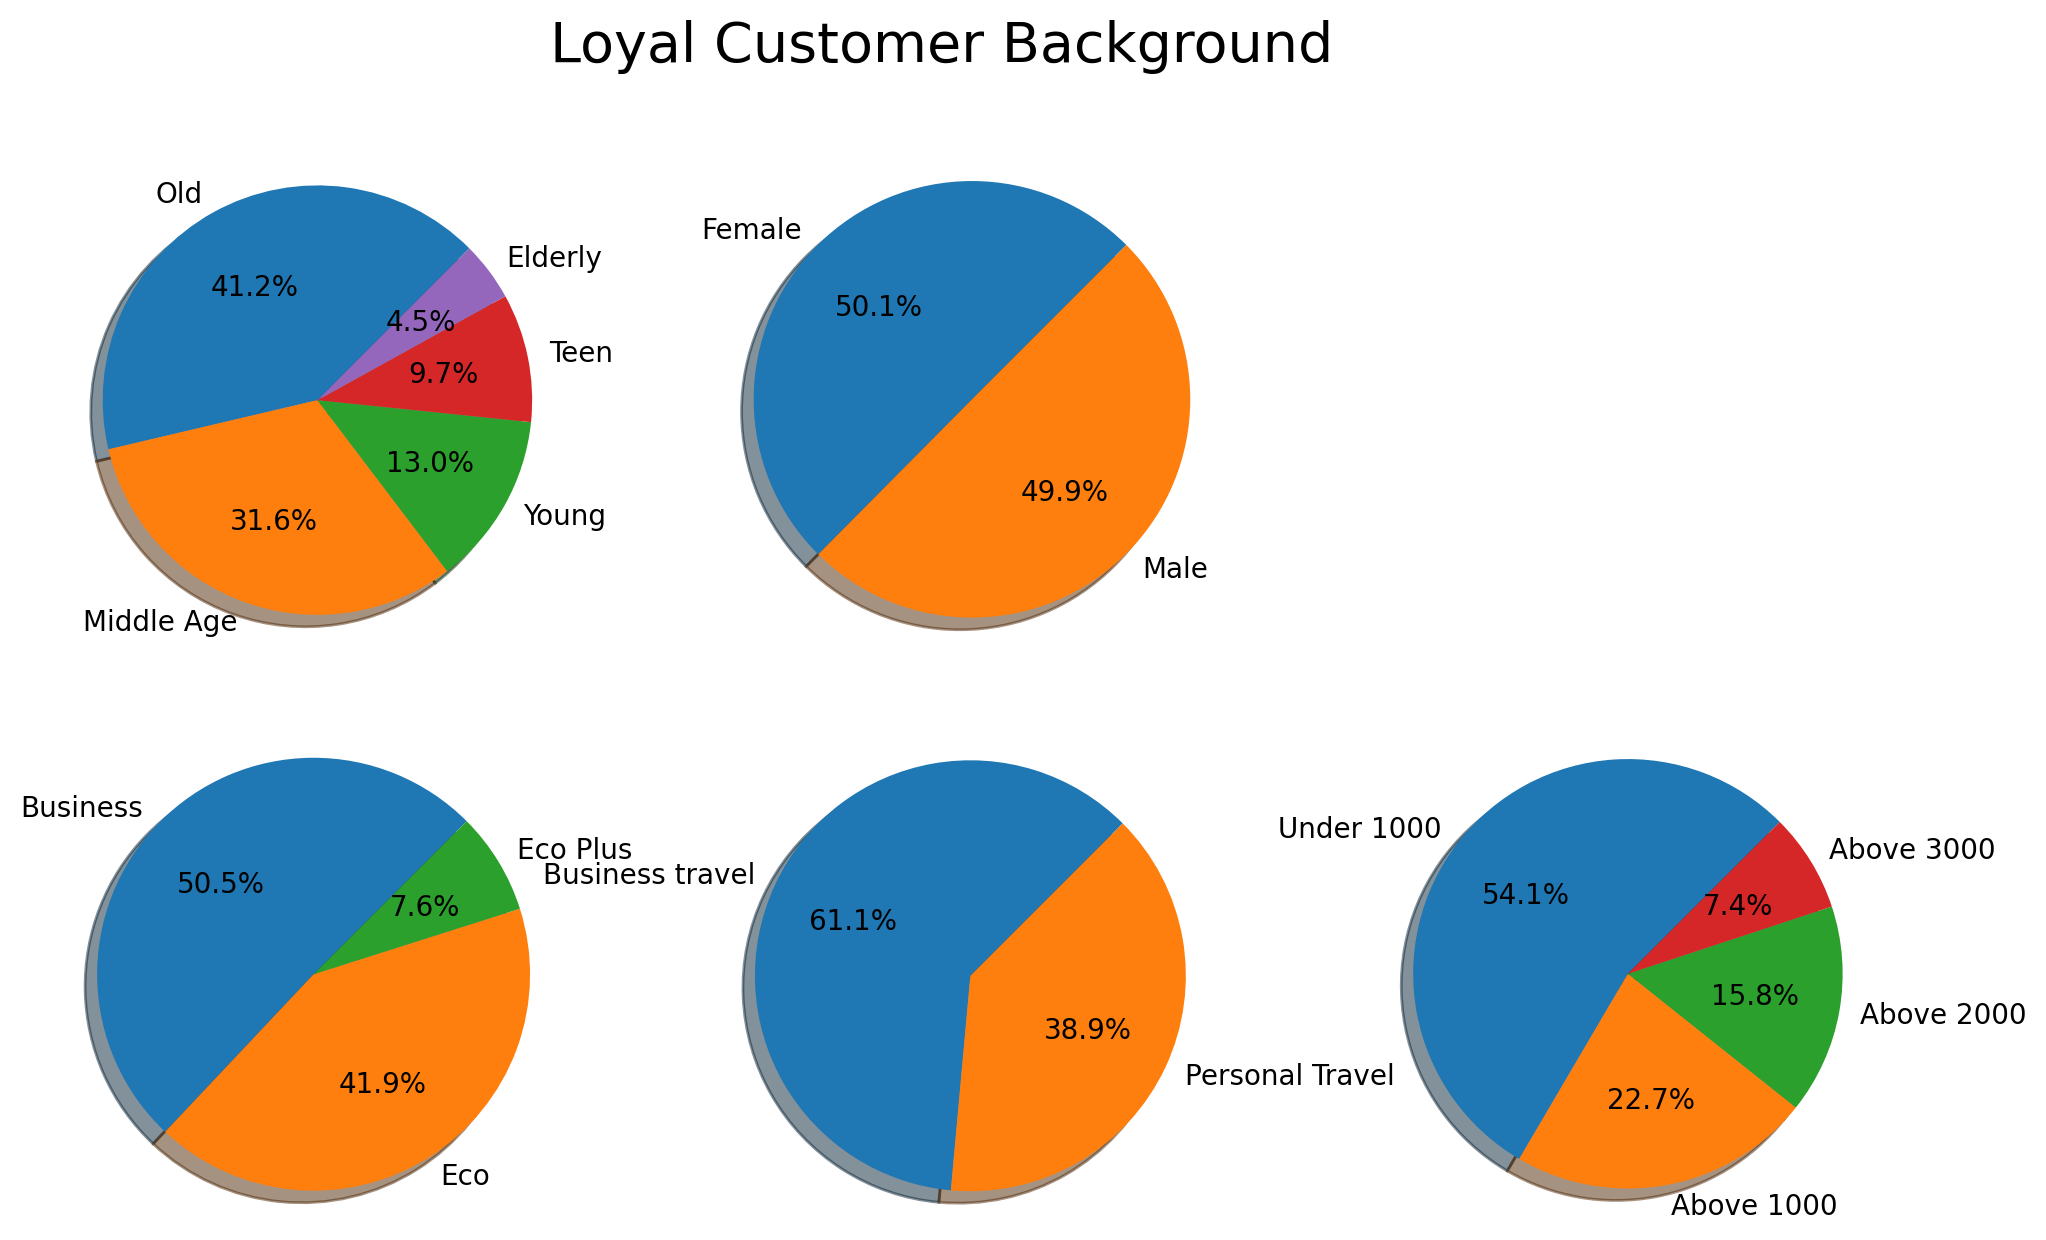

In [89]:
fig1 , ax = plt.subplots(nrows =2,ncols=3,figsize=(12,7),dpi=200,squeeze=False)
fig1.suptitle('Loyal Customer Background', fontsize=20)

ax[0,1].pie(loyal_gender.values,labels=loyal_gender.index,autopct='%1.1f%%',shadow=True,startangle=45)
ax[0,1].axis('equal')

ax[1,1].pie(loyal_type.values,labels=loyal_type.index,autopct='%1.1f%%',shadow=True,startangle=45)
ax[1,1].axis('equal')

ax[1,0].pie(loyal_class.values,labels=loyal_class.index,autopct='%1.1f%%',shadow=True,startangle=45)
ax[1,0].axis('equal')

ax[1,2].pie(loyal_distance.values,labels=loyal_distance.index,autopct='%1.1f%%',shadow=True,startangle=45)
ax[1,2].axis('equal')

ax[0,0].pie(loyal_age.values,labels=loyal_age.index,autopct='%1.1f%%',shadow=True,startangle=45)
ax[0,0].axis('equal')

ax[0,2].set_visible(False)

plt.show()

In [61]:
disloyal_pattern = df_train[df_train['Customer Type'] == 'disloyal Customer']
distance_classifer = []

for i in disloyal_pattern['Flight Distance']:
    if i > 0 and i<=1000:
        distance_classifer.append('Under 1000')
    elif i >= 1000 and i <2000:
        distance_classifer.append('Above 1000')
    elif i >= 2000 and i <3000:  
        distance_classifer.append('Above 2000')
    elif i >= 3000 and i <4000:  
        distance_classifer.append('Above 3000')
    elif i >= 4000 and i <5000:
        distance_classifer.append('Above 4000')
    else:
        distance_classifer.append('Above 5000')    
        
age_classfier = []
for i in disloyal_pattern['Age']:
    if i < 20:
        age_classfier.append('Teen')
    elif i >= 20 and i <30:
        age_classfier.append('Young')
    elif i >= 30 and i <45:  
        age_classfier.append('Middle Age')
    elif i >= 45 and i <=65:  
        age_classfier.append('Old')
    else:
        age_classfier.append('Elderly') 
        
disloyal_pattern['age_classfier'] = age_classfier        
disloyal_pattern['distance_class'] = distance_classifer

<ipython-input-61-7fa7bc1fd2ca>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disloyal_pattern['age_classfier'] = age_classfier
<ipython-input-61-7fa7bc1fd2ca>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disloyal_pattern['distance_class'] = distance_classifer


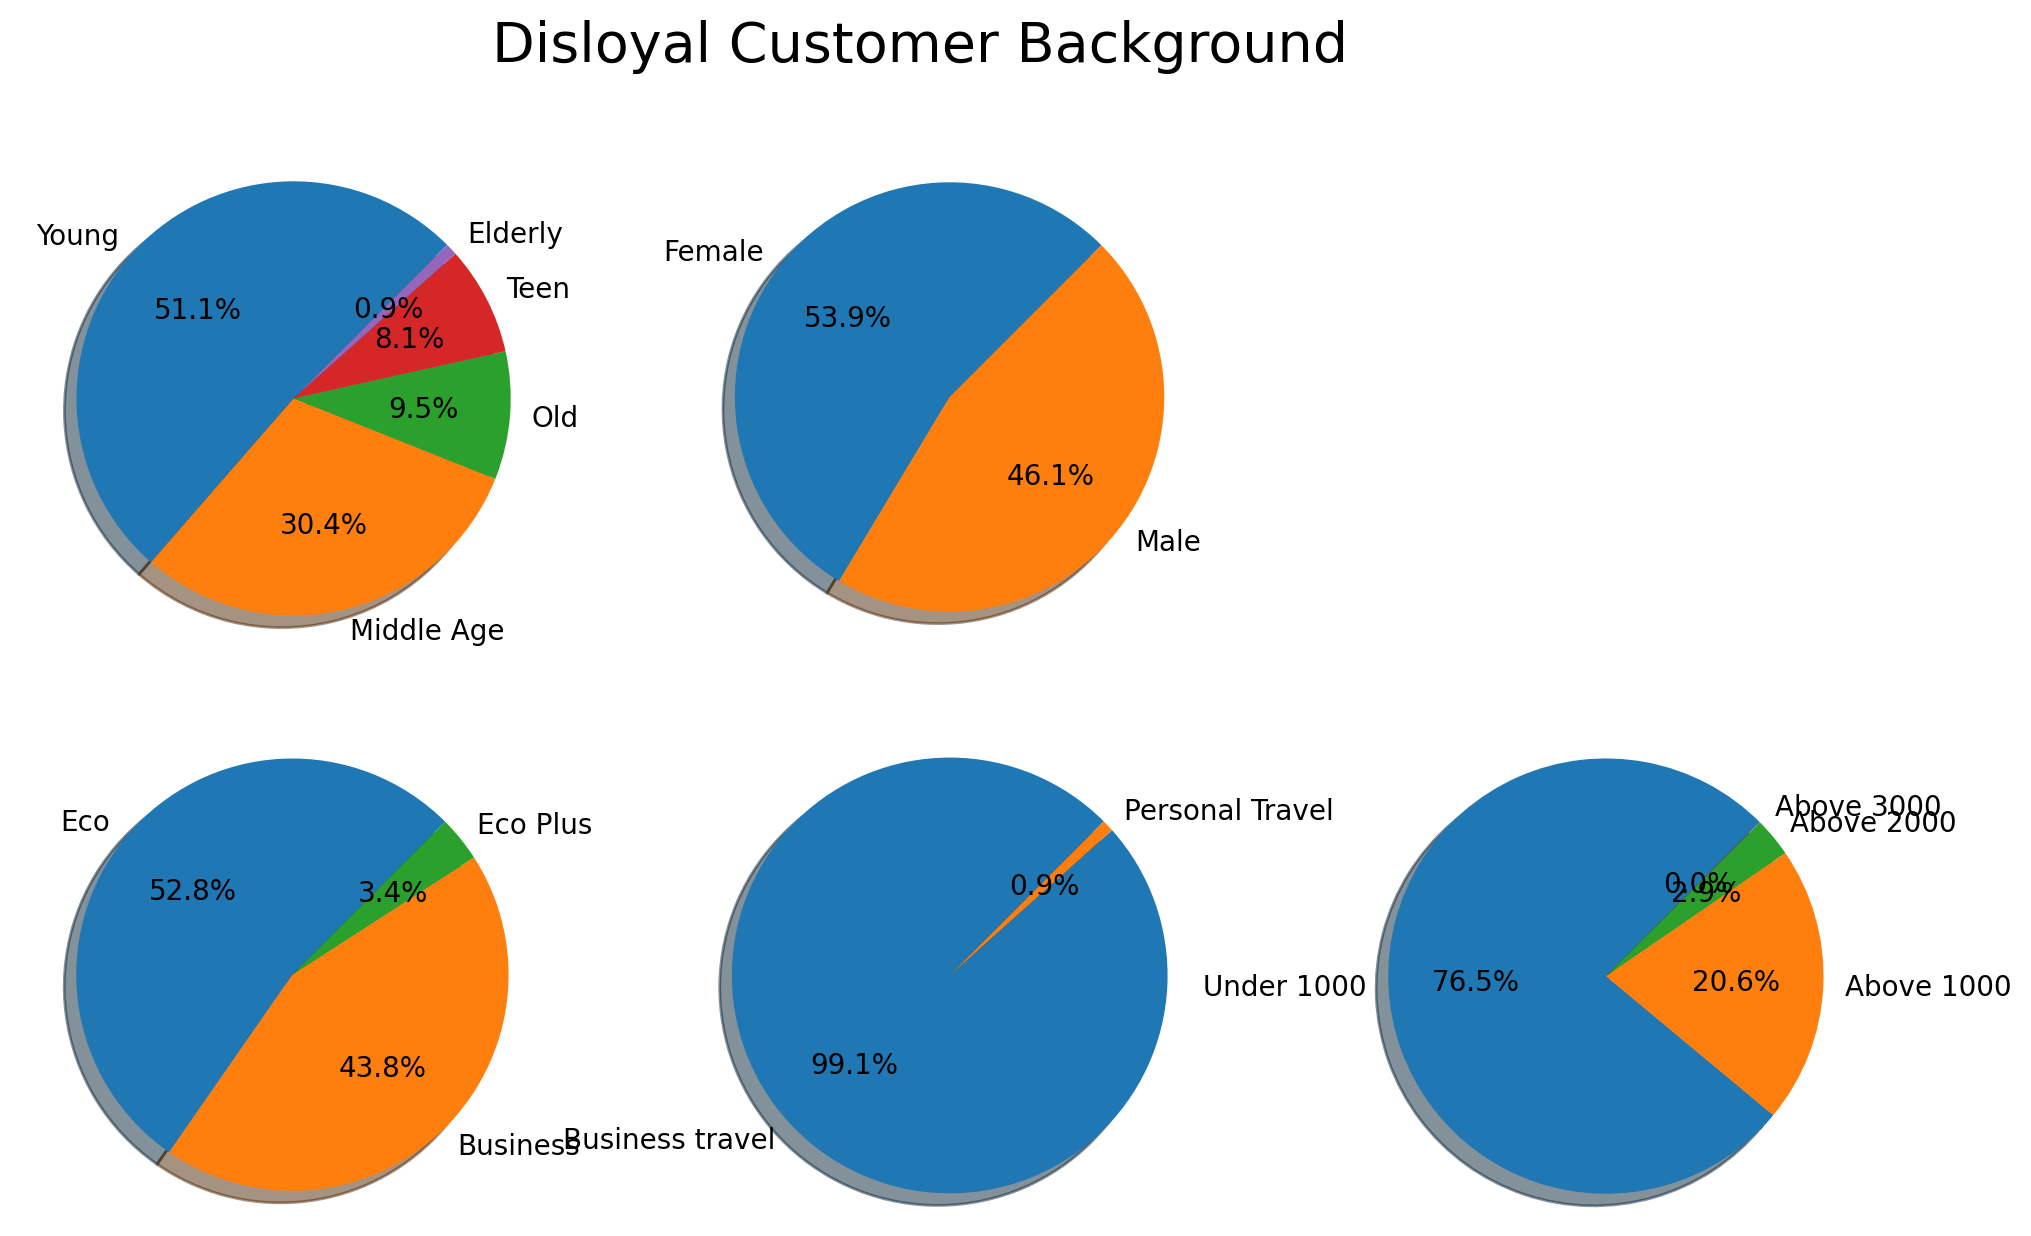

In [62]:
loyal_type = disloyal_pattern['Type of Travel'].value_counts(normalize=True)
loyal_class=disloyal_pattern['Class'].value_counts(normalize=True)
loyal_distance=disloyal_pattern['distance_class'].value_counts(normalize=True)
loyal_age=disloyal_pattern['age_classfier'].value_counts(normalize=True)
loyal_gender = disloyal_pattern['Gender'].value_counts(normalize=True)

fig1 , ax = plt.subplots(nrows =2,ncols=3,figsize=(12,7),dpi=200,squeeze=False)
fig1.suptitle('Disloyal Customer Background', fontsize=20)

ax[0,1].pie(loyal_gender.values,labels=loyal_gender.index,autopct='%1.1f%%',shadow=True,startangle=45)
ax[0,1].axis('equal')

ax[1,1].pie(loyal_type.values,labels=loyal_type.index,autopct='%1.1f%%',shadow=True,startangle=45)
ax[1,1].axis('equal')

ax[1,0].pie(loyal_class.values,labels=loyal_class.index,autopct='%1.1f%%',shadow=True,startangle=45)
ax[1,0].axis('equal')

ax[1,2].pie(loyal_distance.values,labels=loyal_distance.index,autopct='%1.1f%%',shadow=True,startangle=45)
ax[1,2].axis('equal')

ax[0,0].pie(loyal_age.values,labels=loyal_age.index,autopct='%1.1f%%',shadow=True,startangle=45)
ax[0,0].axis('equal')

ax[0,2].set_visible(False)


plt.show()

# 2/How the delay flight impacts on the different types of customer?

In [63]:
depart_late=[]
for i in df_train['Departure Delay in Minutes']:
    if i < 0:
        depart_late.append('soon')
    if i == 0:
        depart_late.append('on time')
    else:
        depart_late.append('late')
df_train['depart_late'] = depart_late

depart_sat = pd.DataFrame(df_train.groupby(['depart_late','Class','Type of Travel'])['satisfaction'].value_counts(normalize=True))
depart_sat.rename(columns={'satisfaction':'values'},inplace=True)
depart_sat.reset_index(inplace=True)

In [64]:
depart_late = depart_sat[depart_sat['depart_late'] == 'late']

<Figure size 1200x800 with 0 Axes>

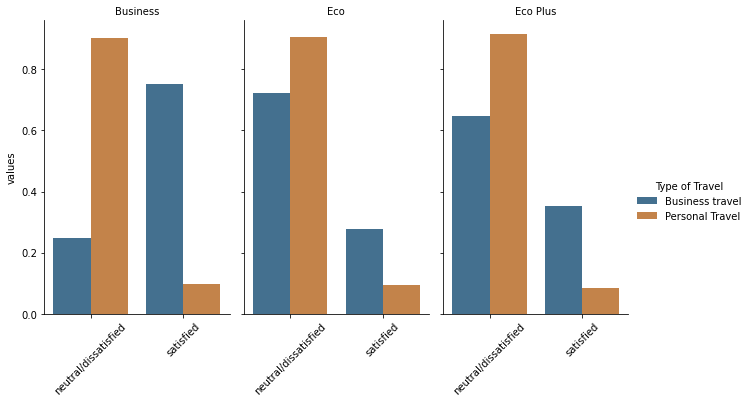

In [65]:
g = plt.figure(dpi=200)
g = sns.catplot(x="satisfaction", y="values", col="Class", hue='Type of Travel',
                data= depart_late, saturation=.5,
                kind="bar", ci=None, aspect=.6,height=5)
(g.set_axis_labels("")
  .set_xticklabels(["neutral/dissatisfied",'satisfied'],fontsize=10,rotation=45).set_titles("{col_name}"))

In [66]:
arrive_late=[]
for i in df_train['Arrival Delay in Minutes']:
    if i < 0:
        arrive_late.append('soon')
    if i == 0:
        arrive_late.append('on time')
    else:
        arrive_late.append('late')
df_train['arrive_late'] = arrive_late

arrive_sat = pd.DataFrame(df_train.groupby(['arrive_late','Class','Type of Travel'])['satisfaction'].value_counts(normalize=True))
arrive_sat.rename(columns={'satisfaction':'values'},inplace=True)
arrive_sat.reset_index(inplace=True)

In [67]:
arrive_late = arrive_sat[arrive_sat['arrive_late'] == 'late']

<Figure size 1200x800 with 0 Axes>

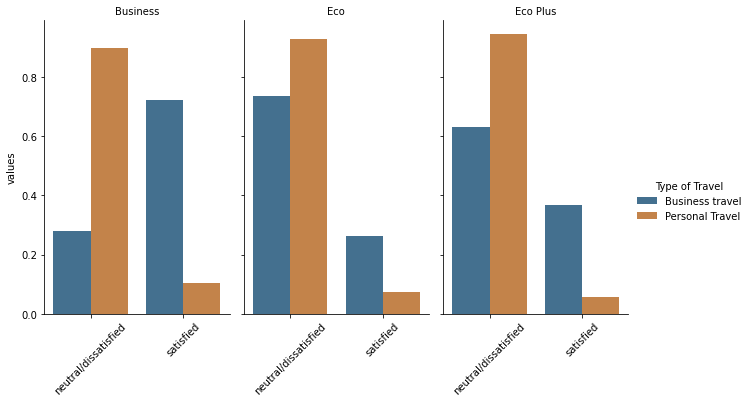

In [68]:
g = plt.figure(dpi=200)
g = sns.catplot(x="satisfaction", y="values", col="Class", hue='Type of Travel',
                data=arrive_late, saturation=.5,
                kind="bar", ci=None, aspect=.6,height=5)
(g.set_axis_labels("")
  .set_xticklabels(["neutral/dissatisfied",'satisfied'],fontsize=10,rotation=45).set_titles("{col_name}"))

Text(0.5, 1.0, 'Departure')

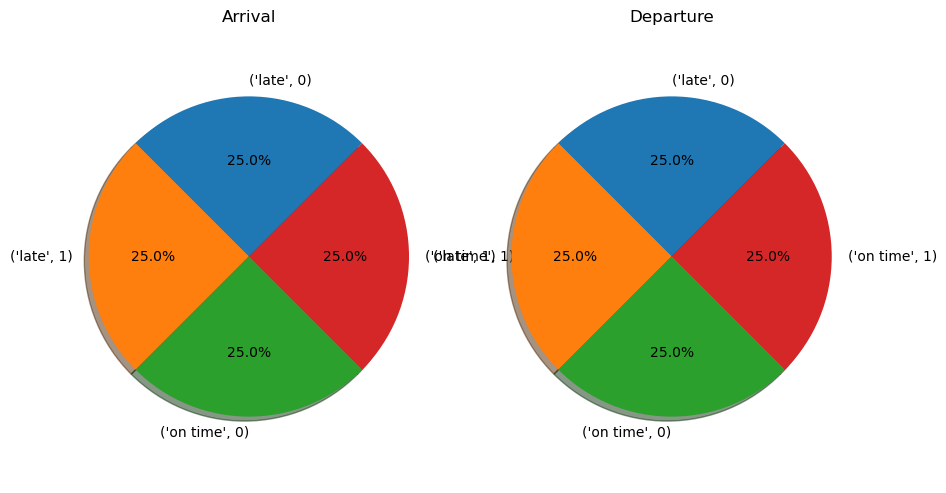

In [69]:
depart_late_pie = depart_sat.groupby('depart_late')['satisfaction'].value_counts(normalize=True)

arrive_late_pie = arrive_sat.groupby('arrive_late')['satisfaction'].value_counts(normalize=True)
fig1 , ax = plt.subplots(ncols = 2, figsize=(10,6),dpi=100)
ax[0].pie(arrive_late_pie.values,labels=arrive_late_pie.index,autopct='%1.1f%%',shadow=True,startangle=45)
ax[0].axis('equal')
ax[0].set_title('Arrival')

ax[1].pie(depart_late_pie.values,labels=depart_late_pie.index,autopct='%1.1f%%',shadow=True,startangle=45)
ax[1].axis('equal')
ax[1].set_title('Departure')

In [70]:
point_col = df_train.drop(labels=['Gender','Age','Type of Travel','Class','Flight Distance','satisfaction','Departure Delay in Minutes','Arrival Delay in Minutes','depart_late','arrive_late'],axis=1)
point_col.groupby(['Customer Type']).aggregate('mean').round(2)

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
Customer Type,,,,,,,,,,,,,,
Loyal Customer,2.75,3.25,2.77,2.96,3.28,3.44,3.61,3.48,3.50,3.43,3.69,3.65,3.71,3.41
disloyal Customer,2.75,2.41,2.74,2.96,3.04,2.75,2.99,3.05,3.33,3.25,3.79,3.60,3.80,3.06


# 3/What we should improve to make disloyal customers become loyal?

<ipython-input-71-ab72598ce2c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disloyal_pattern['satisfaction'] = disloyal_pattern['satisfaction'].astype('category').cat.codes


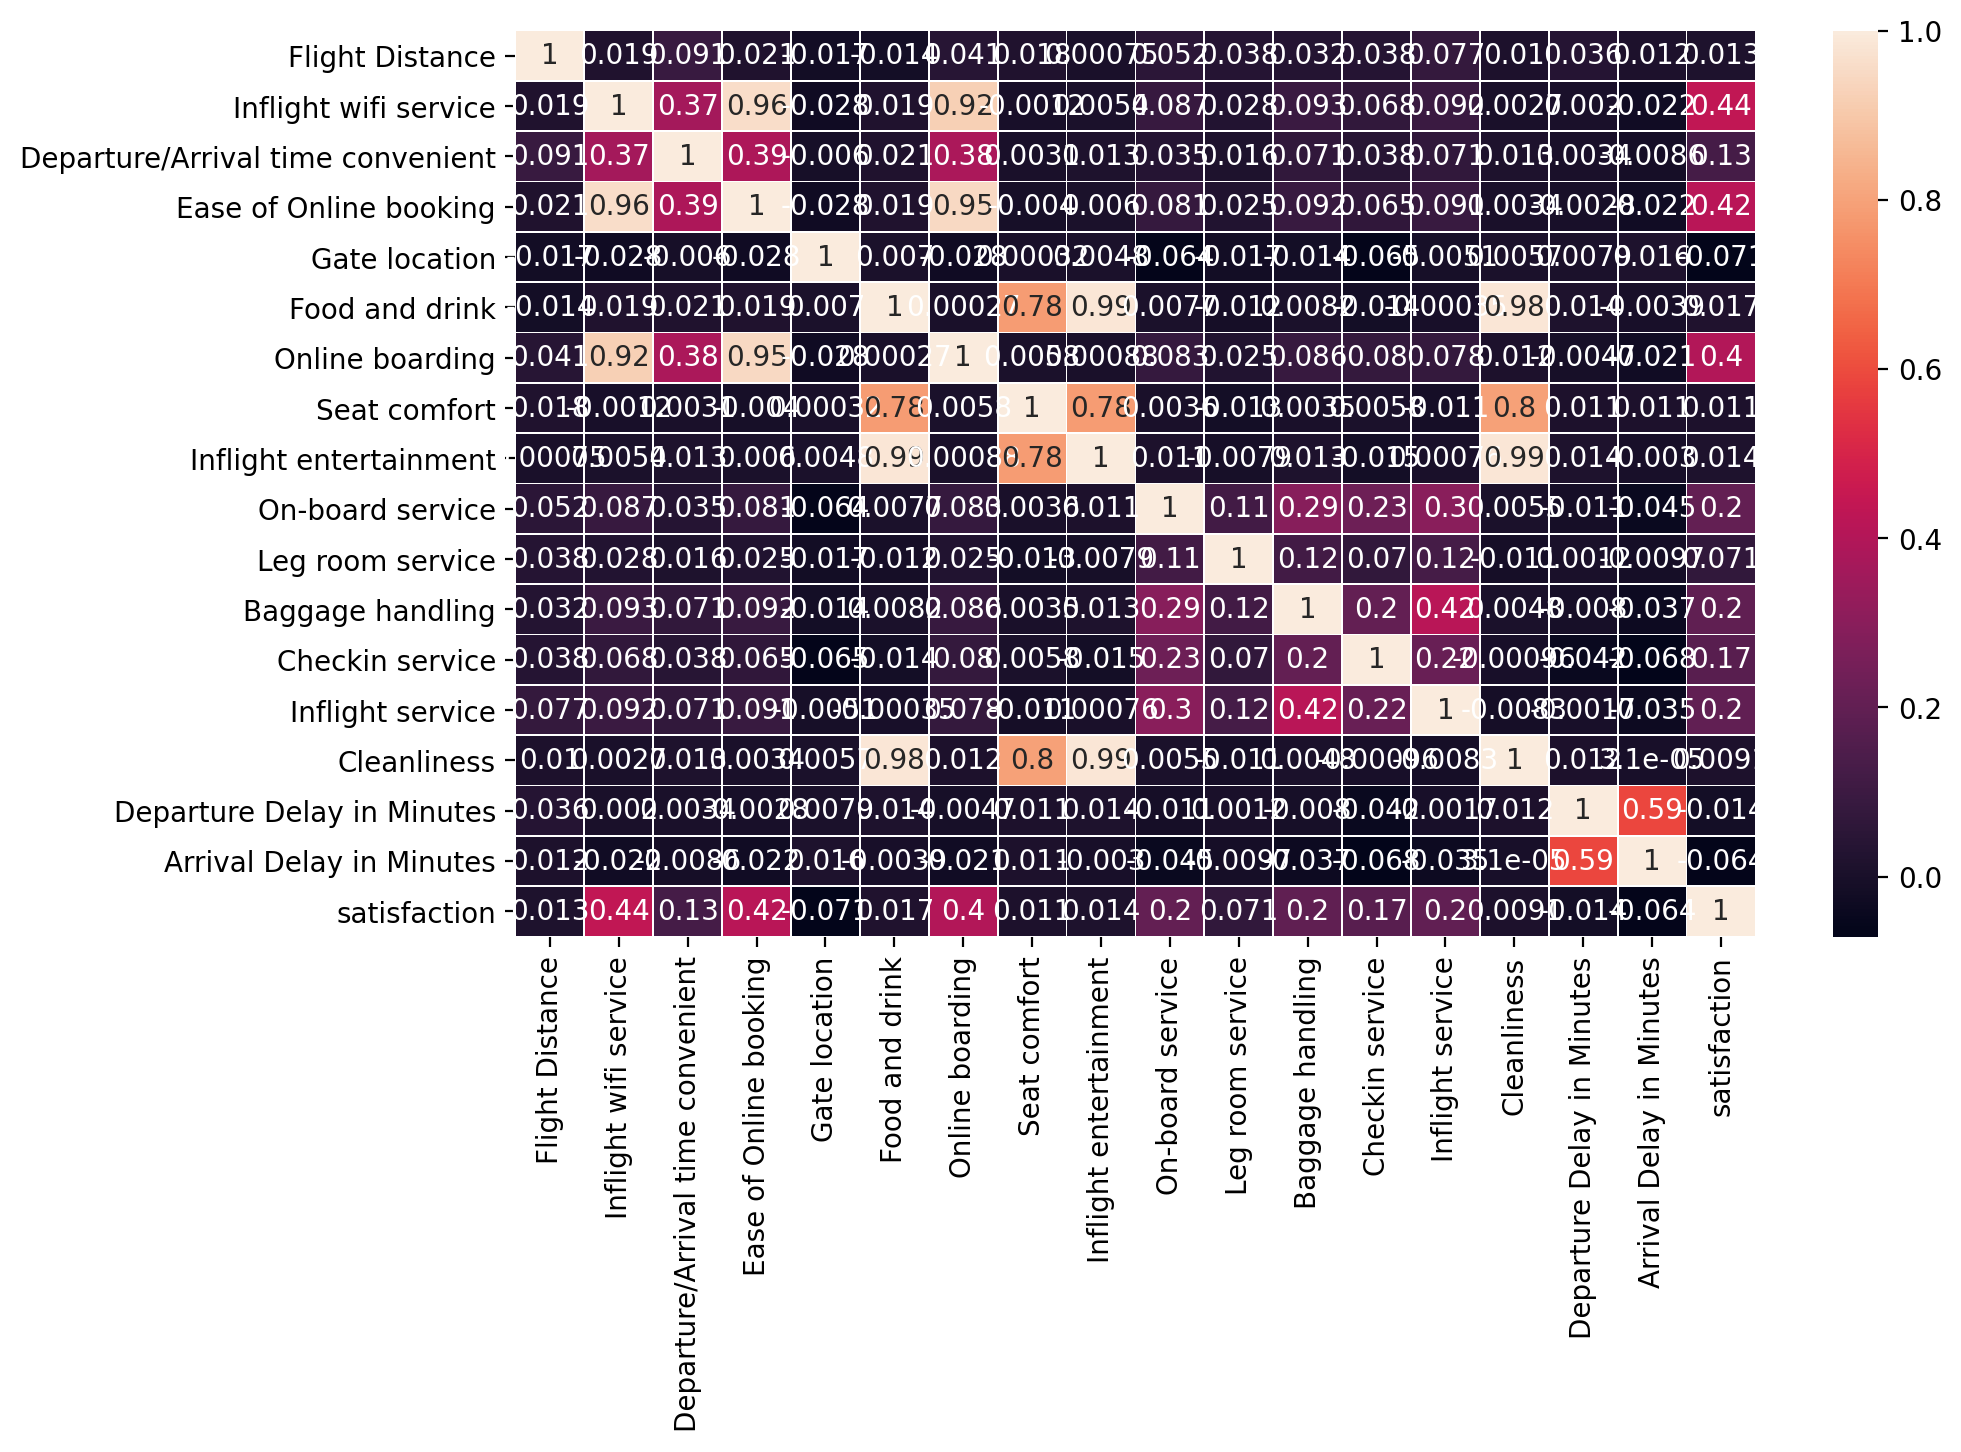

In [71]:
plt.figure(figsize=(10,6),dpi=200)
disloyal_pattern['satisfaction'] = disloyal_pattern['satisfaction'].astype('category').cat.codes
sns.heatmap(disloyal_pattern.drop(labels=['Gender','Customer Type','Age','Type of Travel','Class'],axis=1).corr(),annot=True,linewidths=0.3)
plt.show()

# 4/Whether we should improve the quality of far distance flight?

In [92]:
distance_classifer = []
for i in df_train['Flight Distance']:
    if i > 0 and i<=1000:
        distance_classifer.append('Under 1000')
    elif i >= 1000 and i <2000:
        distance_classifer.append('Above 1000')
    elif i >= 2000 and i <3000:  
        distance_classifer.append('Above 2000')
    elif i >= 3000 and i <4000:  
        distance_classifer.append('Above 3000')
    elif i >= 4000 and i <5000:
        distance_classifer.append('Above 4000')
    else:
        distance_classifer.append('Above 5000')    
df_train['distance'] = distance_classifer

<Figure size 1200x800 with 0 Axes>

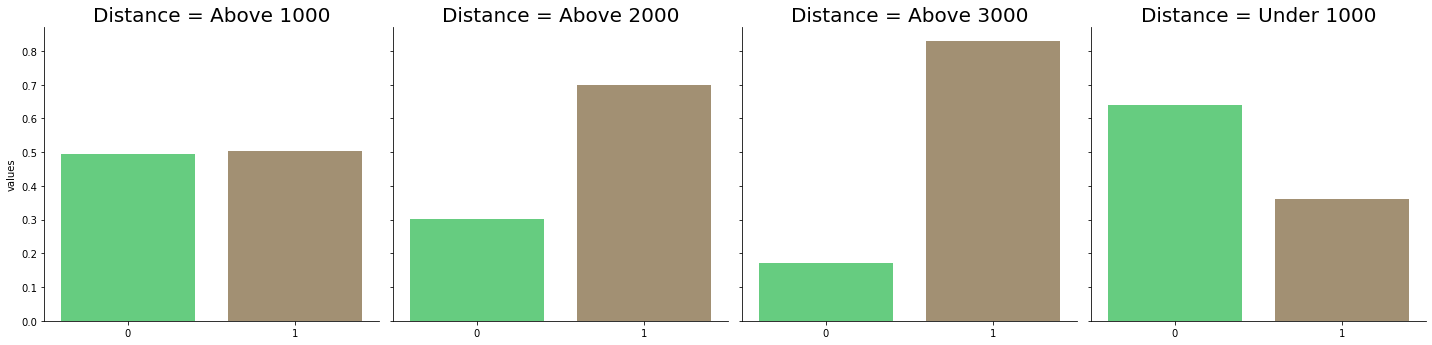

In [73]:
plt.figure(dpi=200)
distance_quality = pd.DataFrame(df_train.groupby(['distance'])['satisfaction'].value_counts(normalize=True))

distance_quality.rename(columns={'satisfaction':'values'},inplace=True)
distance_quality.reset_index(inplace=True)
g=sns.catplot(x='satisfaction',y='values',data=distance_quality,kind='bar',col='distance',palette='terrain')
(g.set_axis_labels("").set_titles("Distance = {col_name}",size=20))

# 5/Should we improve the services having worst score to improve customer's experience?

In [93]:
dissatisfied = df_train[df_train['satisfaction'] == 'neutral or dissatisfied']
dissatisfied.drop(labels=['Gender','Customer Type','Age','Type of Travel','Class','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes'],axis=1,inplace=True)
dissatisfied_points=dissatisfied.groupby(['distance']).aggregate('mean').round(2)
dissatisfied_points = pd.DataFrame(dissatisfied_points.T.unstack()).reset_index()
dissatisfied_points.rename(columns={'level_1':'feature',0:'points'},inplace=True)


In [100]:
dissatisfied_points = dissatisfied_points.sort_values(by='points',ascending=True).head(15)
dissatisfied_points
dissatisfied.drop(labels='distance',axis=1).aggregate('mean').round(2).sort_values()

Inflight wifi service                2.40
Ease of Online booking               2.52
Online boarding                      2.67
Inflight entertainment               2.92
Gate location                        2.95
Cleanliness                          2.98
Food and drink                       3.00
Leg room service                     3.01
Seat comfort                         3.08
On-board service                     3.11
Departure/Arrival time convenient    3.20
Baggage handling                     3.46
Checkin service                      3.47
Inflight service                     3.49
dtype: float64

# Build Predictive Model

In [74]:
df_test

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [109]:
df_test.drop(labels='id',axis=1,inplace=True)

In [110]:
df_train['satisfaction'] = df_train['satisfaction'].astype('category').cat.codes
df_test['satisfaction'] = df_test['satisfaction'].astype('category').cat.codes

In [111]:
#split data
X_train = df_train.drop(labels='satisfaction',axis=1)
y_train = df_train['satisfaction']

In [112]:
X_test = df_test.drop(labels='satisfaction',axis=1)
y_test = df_test['satisfaction']

In [113]:
X_train = pd.get_dummies(X_train)
X_test =  pd.get_dummies(X_test)

In [114]:
X_test

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,52,160,5,4,3,4,3,4,3,5,...,44.0,1,0,1,0,1,0,0,1,0
1,36,2863,1,1,3,1,5,4,5,4,...,0.0,1,0,1,0,1,0,1,0,0
2,20,192,2,0,2,4,2,2,2,2,...,0.0,0,1,0,1,1,0,0,1,0
3,44,3377,0,0,0,2,3,4,4,1,...,6.0,0,1,1,0,1,0,1,0,0
4,49,1182,2,3,4,3,4,1,2,2,...,20.0,1,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,34,526,3,3,3,1,4,3,4,4,...,0.0,0,1,0,1,1,0,1,0,0
25972,23,646,4,4,4,4,4,4,4,4,...,0.0,0,1,1,0,1,0,1,0,0
25973,17,828,2,5,1,5,2,1,2,2,...,0.0,1,0,1,0,0,1,0,1,0
25974,14,1127,3,3,3,3,4,4,4,4,...,0.0,0,1,1,0,1,0,1,0,0


In [40]:
#Scaling data 

In [115]:
col_keep = X_test.columns

In [116]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [117]:
X_train = pd.DataFrame(X_train,columns=col_keep) 
X_test = pd.DataFrame(X_test,columns=col_keep) 

In [123]:
X_train

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,-1.745279,-0.731539,0.203579,0.616172,0.173776,-1.547323,1.352264,-0.185532,1.183099,1.231704,...,0.074169,-1.015031,1.015031,0.472767,-0.472767,-1.490614,1.490614,-0.956906,-0.904327,3.586776
1,-0.951360,-0.957184,0.203579,-0.695245,0.173776,0.018094,-1.656326,-0.185532,-1.849315,-1.769081,...,-0.236313,-1.015031,1.015031,-2.115208,2.115208,0.670865,-0.670865,1.045034,-0.904327,-0.278802
2,-0.885200,-0.047584,-0.549533,-0.695245,-0.541060,-0.764614,1.352264,1.296496,1.183099,1.231704,...,-0.391554,0.985192,-0.985192,0.472767,-0.472767,0.670865,-0.670865,1.045034,-0.904327,-0.278802
3,-0.951360,-0.629246,-0.549533,1.271880,1.603448,1.583511,-0.904178,-0.926545,-1.091211,-1.018885,...,-0.158692,0.985192,-0.985192,0.472767,-0.472767,0.670865,-0.670865,1.045034,-0.904327,-0.278802
4,1.430397,-0.978244,0.203579,-0.039537,0.173776,0.018094,0.600117,1.296496,1.183099,-0.268688,...,-0.391554,-1.015031,1.015031,0.472767,-0.472767,0.670865,-0.670865,1.045034,-0.904327,-0.278802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,-1.083680,-1.000307,-0.549533,-1.350954,-0.541060,0.018094,-0.904178,-0.926545,-1.091211,-1.018885,...,-0.391554,0.985192,-0.985192,-2.115208,2.115208,0.670865,-0.670865,-0.956906,1.105795,-0.278802
103900,0.636478,1.160869,0.956691,0.616172,0.888612,0.800803,-0.904178,0.555482,1.183099,1.231704,...,-0.391554,-1.015031,1.015031,0.472767,-0.472767,0.670865,-0.670865,1.045034,-0.904327,-0.278802
103901,-0.620561,0.807860,-1.302646,-1.350954,-1.255895,0.018094,0.600117,-1.667559,1.183099,0.481508,...,-0.029325,-1.015031,1.015031,-2.115208,2.115208,0.670865,-0.670865,1.045034,-0.904327,-0.278802
103902,-1.149840,-0.189991,-1.302646,-1.350954,-1.255895,1.583511,-1.656326,-1.667559,-1.849315,-1.769081,...,-0.391554,0.985192,-0.985192,-2.115208,2.115208,0.670865,-0.670865,-0.956906,1.105795,-0.278802


In [18]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score, roc_curve
from sklearn import metrics

In [215]:
#logistic regression

log_model= LogisticRegression(random_state=42)
log_model.fit(X_train,y_train)
y_pred=log_model.predict(X_test)

accuracy_train = round(log_model.score(X_train, y_train) * 100, 2)
accuracy_test = round(metrics.accuracy_score(y_test,y_pred) * 100, 2)
print('Train Accuracy Score: {0}%'.format(accuracy_train))
print('Test Accuracy Score: {0}%'.format(accuracy_test))

Train Accuracy Score: 87.51%
Test Accuracy Score: 87.18%


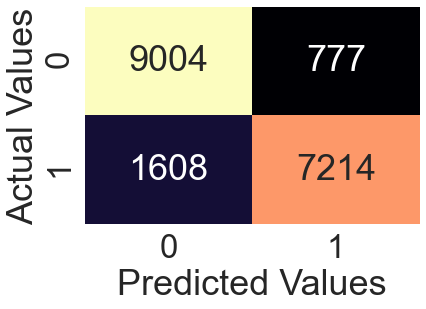

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      9781
           1       0.90      0.82      0.86      8822

    accuracy                           0.87     18603
   macro avg       0.88      0.87      0.87     18603
weighted avg       0.87      0.87      0.87     18603



In [235]:
#Confusion Matrix
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred)),annot=True,cbar=False,cmap='magma',fmt='g')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()
print(classification_report(y_test,y_pred))

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Gender_Female', 'Gender_Male', 'Customer Type_Loyal Customer',
       'Customer Type_disloyal Customer', 'Type of Travel_Business travel',
       'Type of Travel_Personal Travel', 'Class_Business', 'Class_Eco',
       'Class_Eco Plus'],
      dtype='object')

Age Score: -0.125226760351381
Flight Distance Score: -0.125226760351381
Inflight wifi service Score: -0.125226760351381
Departure/Arrival time convenient Score: -0.125226760351381
Ease of Online booking Score: -0.125226760351381
Gate location Score: -0.125226760351381
Food and drink Score: -0.125226760351381
Online boarding Score: -0.125226760351381
Seat comfort Score: -0.125226760351381
Inflight entertainment Score: -0.125226760351381
On-board service Score: -0.125226760351381
Leg room service Score: -0.125226760351381
Baggage handling Score: -0.125226760351381
Checkin service Score: -0.125226760351381
Inflight service Score: -0.125226760351381
Cleanliness Score: -0.125226760351381
Departure Delay in Minutes Score: -0.125226760351381
Arrival Delay in Minutes Score: -0.125226760351381
Gender_Female Score: -0.125226760351381
Gender_Male Score: -0.125226760351381
Customer Type_Loyal Customer Score: -0.125226760351381
Customer Type_disloyal Customer Score: -0.125226760351381
Type of Trave

Seat comfort Score: -0.01015794004207109
Inflight entertainment Score: -0.01015794004207109
On-board service Score: -0.01015794004207109
Leg room service Score: -0.01015794004207109
Baggage handling Score: -0.01015794004207109
Checkin service Score: -0.01015794004207109
Inflight service Score: -0.01015794004207109
Cleanliness Score: -0.01015794004207109
Departure Delay in Minutes Score: -0.01015794004207109
Arrival Delay in Minutes Score: -0.01015794004207109
Gender_Female Score: -0.01015794004207109
Gender_Male Score: -0.01015794004207109
Customer Type_Loyal Customer Score: -0.01015794004207109
Customer Type_disloyal Customer Score: -0.01015794004207109
Type of Travel_Business travel Score: -0.01015794004207109
Type of Travel_Personal Travel Score: -0.01015794004207109
Class_Business Score: -0.01015794004207109
Class_Eco Score: -0.01015794004207109
Class_Eco Plus Score: -0.01015794004207109
Age Score: 0.01015794004207109
Flight Distance Score: 0.01015794004207109
Inflight wifi service

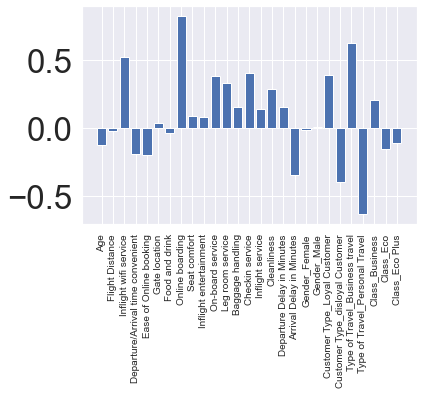

In [270]:
#feature importance
list_col=X_train.columns
importance = log_model.coef_[0]
for i,v in enumerate(importance):
    for n in list_col:
        print(n,'Score:',v)
plt.bar([x for x in range(len(importance))], importance)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26],X_train.columns,rotation=90,fontsize=10)
plt.show()

In [275]:
feature = pd.DataFrame(importance,index=list_col)
feature.reset_index(inplace=True)
feature.rename(columns={'index':'feature',0:'Score'},inplace=True)

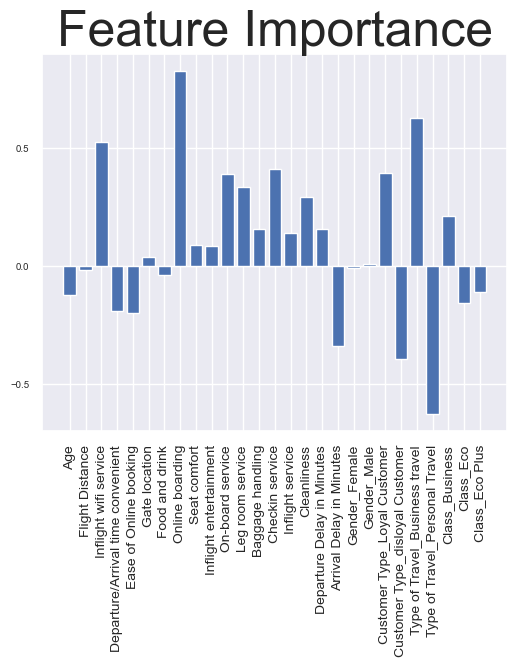

In [294]:
plt.figure(figsize=(6,5),dpi=100)
plt.bar(range(len(feature)), feature['Score'])
plt.xticks(range(len(feature)),X_train.columns,rotation=90,fontsize=10)
plt.yticks(fontsize=7)
plt.title('Feature Importance')
plt.show()

In [45]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [297]:
param_grid = {
  
    'n_estimators': [100, 200, 300, 1000],'max_depth':[3,4,5]
}
rf_model= RandomForestClassifier(n_jobs=-1,random_state=42)

best_model = GridSearchCV(estimator=rf_model,param_grid=param_grid, cv=5)

best_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             param_grid={'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300, 1000]})

In [300]:
y_pred = best_model.predict(X_test)

accuracy_test = round(metrics.accuracy_score(y_test,y_pred) * 100, 2)

print('The accuracy score:',accuracy_test,'as model parameters',best_model.best_params_)

The accuracy score: 92.41 as model parameters {'max_depth': 5, 'n_estimators': 300}


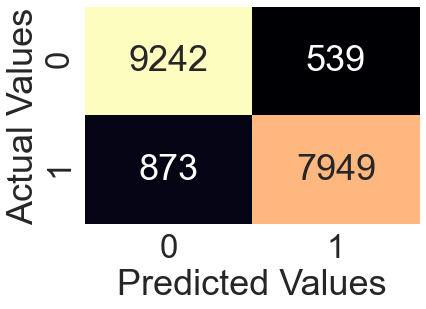

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      9781
           1       0.94      0.90      0.92      8822

    accuracy                           0.92     18603
   macro avg       0.93      0.92      0.92     18603
weighted avg       0.92      0.92      0.92     18603



In [301]:
#Confusion Matrix
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred)),annot=True,cbar=False,cmap='magma',fmt='g')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()
print(classification_report(y_test,y_pred))

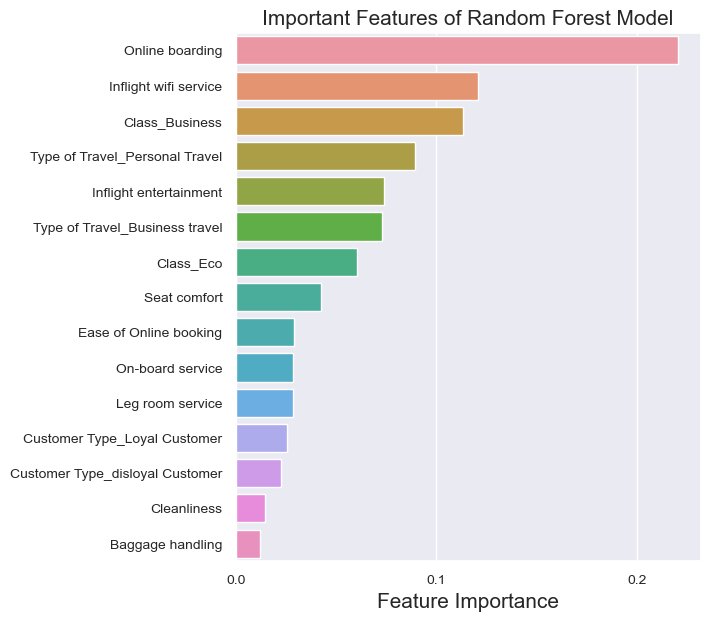

In [324]:
feature_best = pd.Series(best_model.best_estimator_.feature_importances_, index = X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(6,7),dpi=100)

sns.barplot(x=feature_best.head(15),y=feature_best.head(15).index)
plt.xlabel('Feature Importance',size=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Important Features of Random Forest Model",size=15)
plt.show()

In [46]:
param_grid = {
  'learning_rate':[0.01,0.1]
}
gb_model= GradientBoostingClassifier(random_state=42)

best_model2 = GridSearchCV(estimator=gb_model,param_grid=param_grid, cv=5)

best_model2.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1]})

In [48]:
y_pred = best_model2.predict(X_test)

accuracy_test = round(metrics.accuracy_score(y_test,y_pred) * 100, 2)

print('The accuracy score:',accuracy_test,'as model parameters',best_model2.best_params_)

The accuracy score: 94.33 as model parameters {'learning_rate': 0.1}


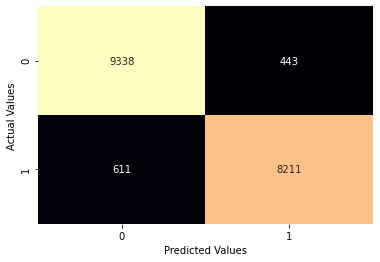

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      9781
           1       0.95      0.93      0.94      8822

    accuracy                           0.94     18603
   macro avg       0.94      0.94      0.94     18603
weighted avg       0.94      0.94      0.94     18603



In [49]:
#Confusion Matrix
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred)),annot=True,cbar=False,cmap='magma',fmt='g')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()
print(classification_report(y_test,y_pred))

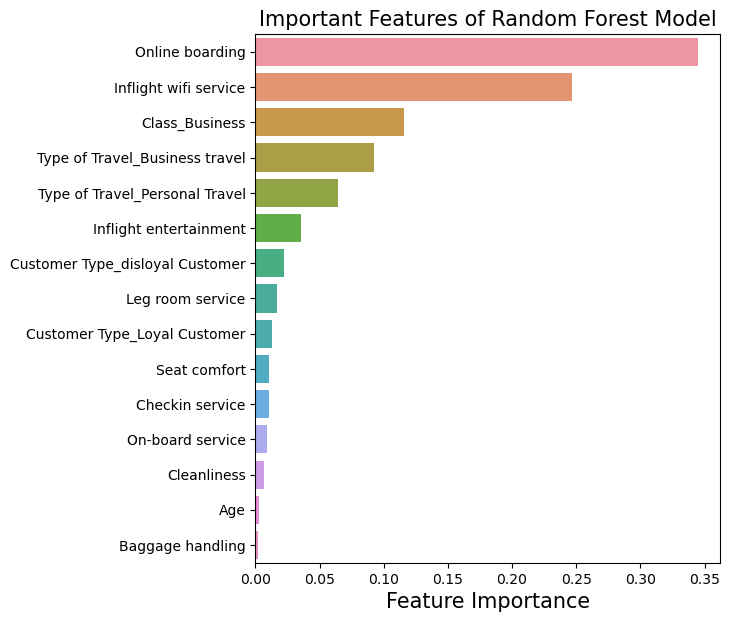

In [50]:
feature_best = pd.Series(best_model2.best_estimator_.feature_importances_, index = X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(6,7),dpi=100)

sns.barplot(x=feature_best.head(15),y=feature_best.head(15).index)
plt.xlabel('Feature Importance',size=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Important Features of Random Forest Model",size=15)
plt.show()

In [52]:
y_train

0         0
2         1
4         1
5         0
6         0
         ..
103899    0
103900    1
103901    0
103902    0
103903    0
Name: satisfaction, Length: 74649, dtype: int8

In [53]:
df_train

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
5,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,1,...,1,3,4,4,4,4,1,0,0.0,0
6,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,3,...,2,3,3,4,3,5,2,9,23.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,0
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,1
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,0
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,0
